        HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  \
0                        0.0     1.0       1.0        1.0  40.0     1.0   
1                        0.0     0.0       0.0        0.0  25.0     1.0   
2                        0.0     1.0       1.0        1.0  28.0     0.0   
3                        0.0     1.0       0.0        1.0  27.0     0.0   
4                        0.0     1.0       1.0        1.0  24.0     0.0   
...                      ...     ...       ...        ...   ...     ...   
253675                   0.0     1.0       1.0        1.0  45.0     0.0   
253676                   0.0     1.0       1.0        1.0  18.0     0.0   
253677                   0.0     0.0       0.0        1.0  28.0     0.0   
253678                   0.0     1.0       0.0        1.0  23.0     0.0   
253679                   1.0     1.0       1.0        1.0  25.0     0.0   

        Stroke  Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  \
0          0.0       0.0     

C:\Users\dogukan.ozgen\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


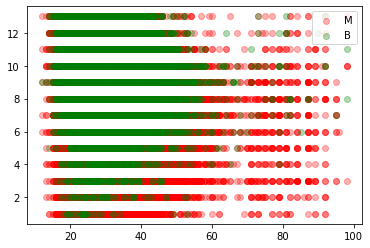

[[ 2166  5789]
 [ 7036 69569]]
              precision    recall  f1-score   support

           0       0.24      0.27      0.25      7955
           1       0.92      0.91      0.92     76605

    accuracy                           0.85     84560
   macro avg       0.58      0.59      0.58     84560
weighted avg       0.86      0.85      0.85     84560



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('dataset/heart_disease_health_indicators.csv')

print(data)


#data.drop(['Unnamed: 32','id'],axis=1,inplace=True)
M = data[data.HeartDiseaseorAttack == 0.0]
B = data[data.HeartDiseaseorAttack == 1.0]




plt.scatter(M.BMI,M.Age, color='r',label='M',alpha=0.3)
plt.scatter(B.BMI,B.Age, color='g',label='B',alpha=0.3)

plt.legend()
plt.show()

data.HeartDiseaseorAttack = [1 if each == 0.0 else 0 for each in data.HeartDiseaseorAttack]

x_data = data.drop(['HeartDiseaseorAttack'],axis = 1)

y = data.HeartDiseaseorAttack.values

x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)) #normailizasyon

#train test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=1/3,random_state=1)

#model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

#train

dt.fit(x_train,y_train)

#predict

y_pred = dt.predict(x_test)

#score

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

print(cm)

'''

print(cm)
TRUE_NEGATIVE   FALSE_POSITIVE
FALSE_NEGATIVE  TRUE_POSITIVE  
'''

from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))


